# Lab 1: Proximal Denoising

Welcome to the advanced Large Scale Distributed Optimisation Course.

The objective of this lab session is to handle proximal denoising by denoising an image using wavelets.

We begin with the standard imports:

In [2]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt

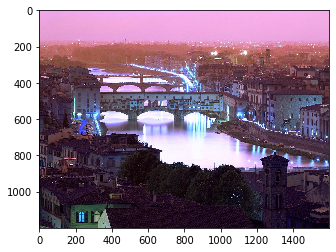

In [24]:
im = cv2.imread('florence.jpg')
plt.imshow(im)

Let's add some random gaussian noise to our image :

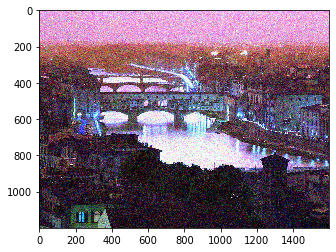

In [4]:
im_noise = im + np.random.normal(0,30,size=im.shape)
im_noise = np.clip(im_noise, 0, 255).astype('int')
plt.imshow(im_noise)

In [14]:
L = pywt.wavedec2(im_noise,'db8',level=2,axes=(0,1))

In [89]:
penalizations = {}

penalizations[1] = lambda eps, khi: np.multiply(np.sign(eps), np.maximum(abs(eps)-khi,np.zeros(eps.shape)))
penalizations[4/3] = lambda eps, khi: eps + 4*khi * (np.power(np.sqrt(np.power(eps,2)+256*khi**3/729) - khi, 1/3) - 
                                                     np.power(np.sqrt(np.power(eps,2)+256*khi**3/729) + khi, 1/3)) / (3*2**(1/3))
penalizations[3/2] = lambda eps, khi: eps + np.multiply(9*khi**2*np.sign(eps), 
                                                        1 - np.sqrt(1+16*abs(eps)/(9*khi**2))) / 8
penalizations[2] = lambda eps, khi: eps / (1 + 2*khi)
penalizations[3] = lambda eps, khi: np.multiply(np.sign(eps), 
                                                (np.sqrt(1+12*khi*abs(eps)) - 1) / (6*khi))
penalizations[4] = lambda eps, khi: (np.power((np.sqrt(np.power(eps,2)+1/(27*khi)) + eps)/(8*khi), 1/3) - 
                                     np.power((np.sqrt(np.power(eps,2)+1/(27*khi)) - eps)/(8*khi), 1/3))

In [102]:
khi = 10
pen = 3/2
prox_L = [L[0],[penalizations[pen](coef,khi) for coef in L[1]], [penalizations[pen](coef,khi) for coef in L[2]]]

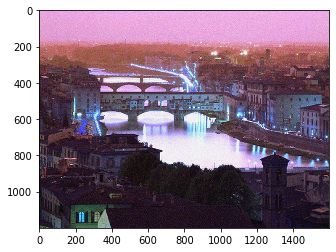

In [103]:
reconstructed_im = pywt.waverec2(prox_L,'db8',axes=(0,1))
reconstructed_im = np.clip(reconstructed_im, 0, 255).astype('int')
plt.imshow(reconstructed_im)